<a href="https://colab.research.google.com/github/JoaqSM/ML_course-colab-files/blob/main/Titanic_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Conjunto de Datos: Titanic


In [71]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
df.shape

(891, 15)

In [73]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Se eliminan los atributos redudantes:
- 'pclass' equivalente a 'class'
- 'embarked' equivalente a 'embarked_town'
- 'who' equivalente a 'sex'

Se eliminan los atributos con un porcentaje elevado de datos faltantes: 'age' y 'deck'.

Se eliminan los atributos 'alive' y 'alone' pues no son utilizados en otras versiones del conjunto de datos.

In [74]:
df = df.drop(columns=['pclass', 'age', 'embarked', 'who', 'deck', 'alive', 'alone'])

Se eliminan los pasajeros que aún presenten datos faltantes.

In [75]:
df = df.dropna()

In [76]:
df.head()

,survived,sex,sibsp,parch,fare,class,adult_male,embark_town
0,0,male,1,0,7.2500,Third,True,Southampton
1,1,female,1,0,71.2833,First,False,Cherbourg
2,1,female,0,0,7.9250,Third,False,Southampton
3,1,female,1,0,53.1000,First,False,Southampton
4,0,male,0,0,8.0500,Third,True,Southampton


One-hot Encoding de los atributos categoricos, pues la implementación de árbol de desición de Scikit-Learn no acepta atributos categoricos.

In [77]:
df = pd.get_dummies(data=df, drop_first=True)

In [78]:
df.head()

,survived,sibsp,parch,fare,adult_male,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,7.2500,True,1,0,1,0,1
1,1,1,0,71.2833,False,0,0,0,0,0
2,1,0,0,7.9250,False,0,0,1,0,1
3,1,1,0,53.1000,False,0,0,0,0,1
4,0,0,0,8.0500,True,1,0,1,0,1


# División en subconjuntos de entrenamiento y pruebas

In [79]:
X = df.drop(columns="survived")
y = df[["survived"]]

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Entrenar Desicion Tree

In [81]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=1234)
dtree = dtree.fit(X_train, y_train)

# Métricas Accuaracy, F1 Score y matriz de confusión

In [82]:
y_predicted = dtree.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)

print("Accuracy score = " + str(accuracy))
print("F1 score = " + str(f1))

Accuracy score = 0.797752808988764
F1 score = 0.7403846153846154


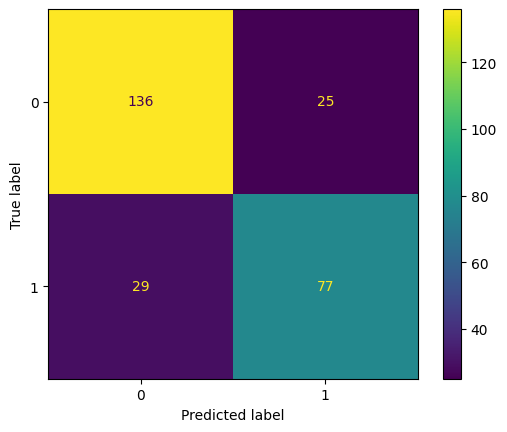

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predicted, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)

disp.plot()

# Visualización del árbol de decisión

[Text(0.48702830188679247, 0.9705882352941176, 'x[3] <= 0.5\ngini = 0.469\nsamples = 622\nvalue = [388, 234]'),
 Text(0.20577830188679244, 0.9117647058823529, 'x[6] <= 0.5\ngini = 0.413\nsamples = 250\nvalue = [73, 177]'),
 Text(0.07547169811320754, 0.8529411764705882, 'x[2] <= 28.856\ngini = 0.103\nsamples = 128\nvalue = [7, 121]'),
 Text(0.05660377358490566, 0.7941176470588235, 'x[2] <= 28.231\ngini = 0.177\nsamples = 51\nvalue = [5, 46]'),
 Text(0.04716981132075472, 0.7352941176470589, 'x[8] <= 0.5\ngini = 0.147\nsamples = 50\nvalue = [4, 46]'),
 Text(0.03773584905660377, 0.6764705882352942, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.05660377358490566, 0.6764705882352942, 'x[1] <= 1.5\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(0.04716981132075472, 0.6176470588235294, 'x[2] <= 24.5\ngini = 0.188\nsamples = 38\nvalue = [4, 34]'),
 Text(0.02830188679245283, 0.5588235294117647, 'x[2] <= 13.75\ngini = 0.142\nsamples = 26\nvalue = [2, 24]'),
 Text(0.018867924528301886,

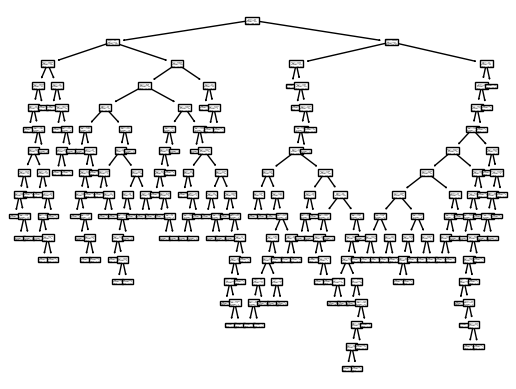

In [85]:
tree.plot_tree(dtree)

# Predicción de instancia al azar

In [86]:
sample = df.sample(n=1, random_state=1234)

sample_X = sample.drop(columns="survived")
sample_y = sample[["survived"]]

In [87]:
sample_X

,sibsp,parch,fare,adult_male,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
608,1,2,41.5792,False,0,1,0,0,0


In [88]:
sample_y

,survived
608,1


In [89]:
prediction = dtree.predict(sample_X)

print("Real 'survived' value: " + str(sample_y.iloc[0]['survived']))
print("Predicted 'survived' value: " + str(prediction[0]))

Real 'survived' value: 1
Predicted 'survived' value: 1
